In [1]:
import pandas as pd

ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

ev_data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [2]:
import pandas as pd

# Read the CSV file
ev_data = pd.read_csv('Electric_Vehicle_Population_Data.csv')

# Show basic information about the DataFrame
print("Shape of DataFrame (rows, columns):", ev_data.shape)
print("\nColumns in the DataFrame:", list(ev_data.columns))

Shape of DataFrame (rows, columns): (177866, 17)

Columns in the DataFrame: ['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year', 'Make', 'Model', 'Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Vehicle Location', 'Electric Utility', '2020 Census Tract']


In [3]:
ev_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [4]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [3]:
# 1.  percentage of missing values in each column
missing_percentage = (ev_data.isnull().sum() / len(ev_data)) * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
VIN (1-10)                                           0.000000
County                                               0.002811
City                                                 0.002811
State                                                0.000000
Postal Code                                          0.002811
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.218704
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.005060
Electric Utility         

In [6]:
# 4 Drop rows with missing values
ev_data_cleaned = ev_data.dropna()
print("\nShape before dropping NA:", ev_data.shape)
print("Shape after dropping NA:", ev_data_cleaned.shape)


Shape before dropping NA: (177866, 17)
Shape after dropping NA: (177473, 17)


In [7]:
ev_data = ev_data.dropna(subset=['County','City','Postal Code','Legislative District','Vehicle Location','Electric Utility','2020 Census Tract'])
print(pd.isnull(ev_data).sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


In [8]:
duplicate_count = ev_data.duplicated().sum() 
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


In [9]:
# DataFrame 1: Basic vehicle information
vehicle_df = pd.DataFrame(ev_data[['Make', 'Model', 'Model Year', 'Electric Vehicle Type']])
print("Vehicle Information DataFrame:")
vehicle_df.head()

Vehicle Information DataFrame:


,Make,Model,Model Year,Electric Vehicle Type
0,TESLA,MODEL Y,2020,Battery Electric Vehicle (BEV)
1,TESLA,MODEL Y,2023,Battery Electric Vehicle (BEV)
2,TESLA,MODEL S,2019,Battery Electric Vehicle (BEV)
3,TESLA,MODEL S,2016,Battery Electric Vehicle (BEV)
4,TESLA,MODEL Y,2021,Battery Electric Vehicle (BEV)


In [10]:
#ev_data   remove#

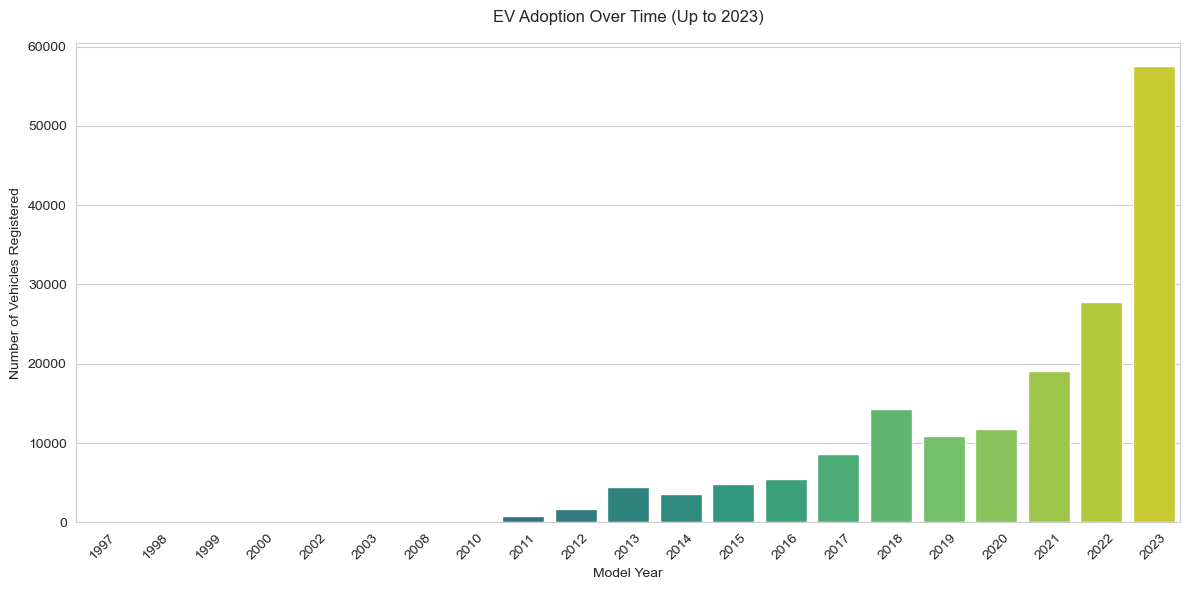


Total vehicles up to 2023: 170786

Vehicles by year:
2023    57587
2022    27776
2021    19132
2020    11768
2019    10940
2018    14323
2017     8562
2016     5483
2015     4844
2014     3509
2013     4409
2012     1618
2011      775
2010       23
2008       20
2003        1
2002        2
2000        7
1999        5
1998        1
1997        1
Name: Model Year, dtype: int64


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Filter data up to 2023
ev_data_filtered = ev_data[ev_data['Model Year'] <= 2023]

# Create plot
plt.figure(figsize=(12, 6))
ev_adoption_by_year = ev_data_filtered['Model Year'].value_counts().sort_index()
sns.barplot(x=ev_adoption_by_year.index, 
            y=ev_adoption_by_year.values, 
            palette="viridis")

# Customize plot
plt.title('EV Adoption Over Time (Up to 2023)', fontsize=12, pad=15)
plt.xlabel('Model Year', fontsize=10)
plt.ylabel('Number of Vehicles Registered', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()

# Optional: Print statistics
print("\nTotal vehicles up to 2023:", len(ev_data_filtered))
print("\nVehicles by year:")
print(ev_adoption_by_year.sort_index(ascending=False))


The output graph shows:

X-axis: Model years from 1997 to 2024
Y-axis: Number of registered EVs (from 0 to 60,000)
Each bar represents how many EVs were registered for that model year

Key observations from the graph:

There's a dramatic increase in EV adoption in recent years
The peak is around 2023 with nearly 60,000 vehicles
Before 2010, there was very minimal EV adoption
There's a noticeable drop in 2024, likely because that year isn't complete yet or the data is still being collected

The gradient color scheme (from dark green to yellow) helps visualize the progression over time, with newer years shown in lighter colors.

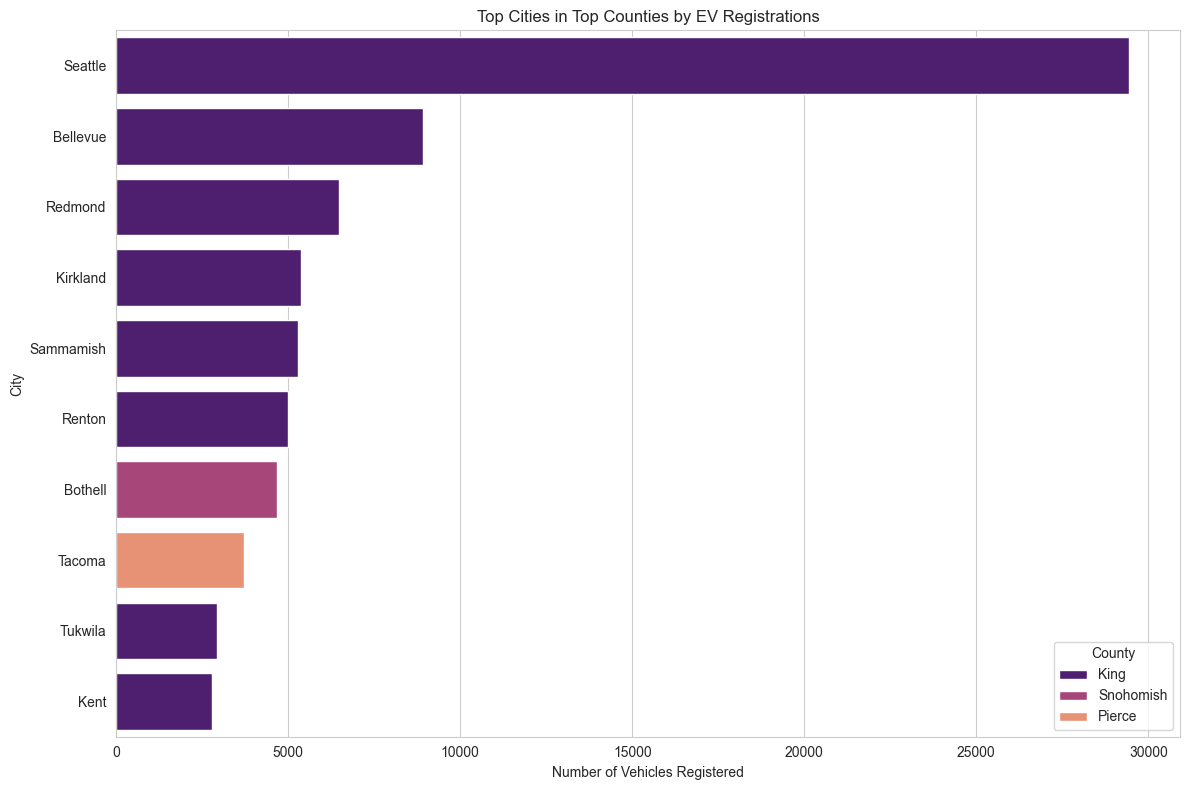

In [24]:
# geographical distribution at county level
ev_county_distribution = ev_data['County'].value_counts() # Counts EVs per county
top_counties = ev_county_distribution.head(3).index # Gets top 3 counties

# filtering the dataset for these top counties
top_counties_data = ev_data[ev_data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties(groups county and city and sorts that is descending order)
ev_city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = ev_city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()





This Creates
A horizontal bar chart showing the top 10 cities with the most EV registrations

The Output Shows:
Y-axis: Cities (Seattle, Bellevue, Redmond, etc.)
X-axis: Number of vehicles registered (0 to 30,000)
Colors indicate different counties:

Purple bars: King County
Pink bar: Snohomish County
Orange bar: Pierce County

Key Observations:
Seattle has the highest number of EV registrations (about 30,000)
Bellevue is second with around 10,000 registrations
Most top cities are in King County (purple bars)
Tacoma (in Pierce County) and Bothell (in Snohomish County) are the only cities from different counties in the top 10

This visualization effectively shows how EV adoption is concentrated in certain urban areas, with Seattle dominating the registrations by a significant margin

C:\Users\aynay\AppData\Local\Temp\ipykernel_3784\2107807950.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")


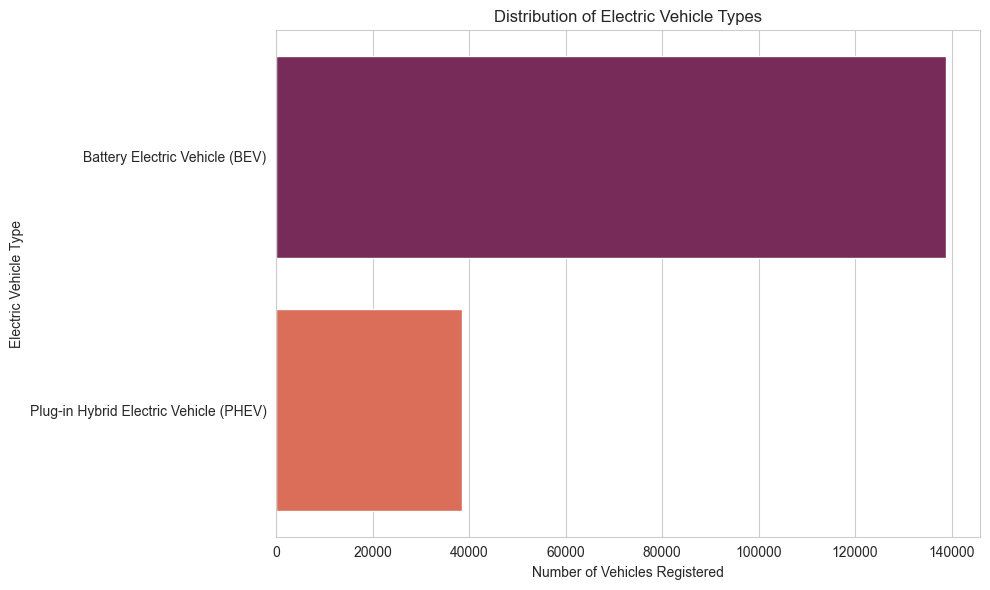

In [13]:
# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket") #palette rocket is used for coloring of bar chart
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()


Total vehicles by type:
--------------------------------------------------
Battery Electric Vehicle (BEV)            139210
Plug-in Hybrid Electric Vehicle (PHEV)     38656
Name: Electric Vehicle Type, dtype: int64


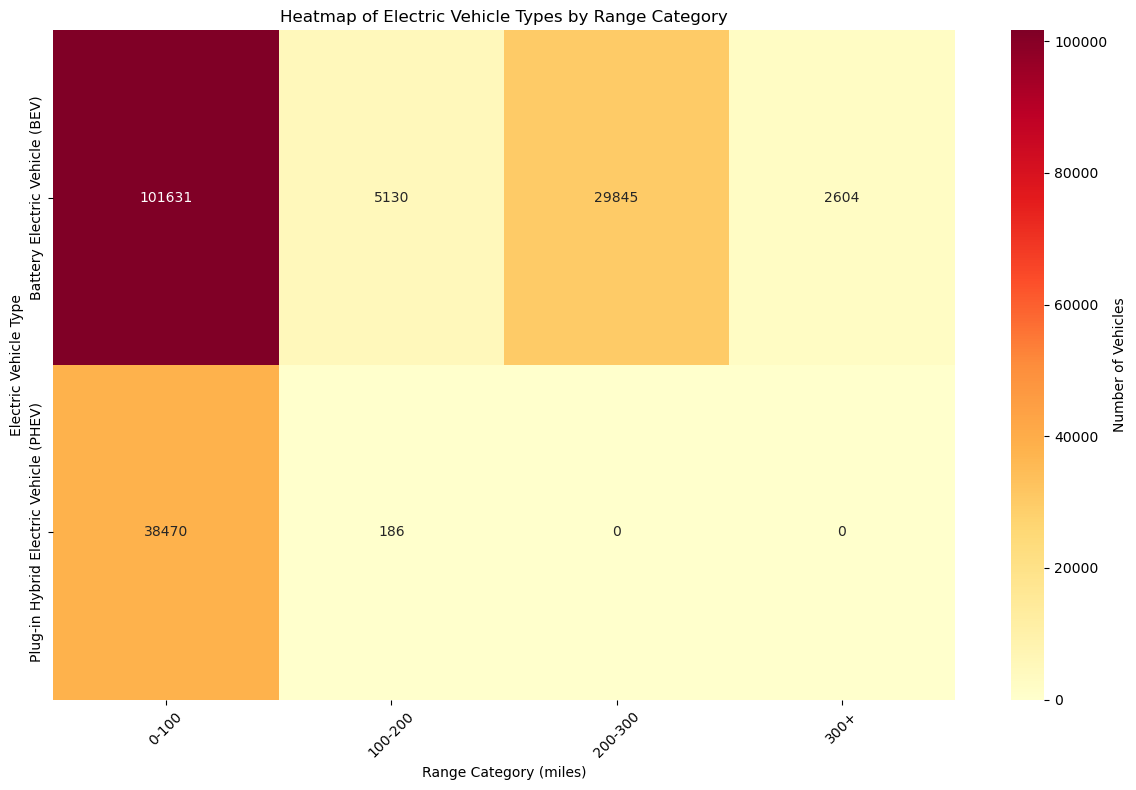

In [2]:
""""# analyzing the distribution of electric vehicle Types
ev_type_distribution = ev_data['Electric Vehicle Type'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create range categories
def create_range_category(range_value):
    if range_value < 100:
        return '0-100'
    elif range_value < 200:
        return '100-200'
    elif range_value < 300:
        return '200-300'
    else:
        return '300+'

# Create the heatmap data
def create_ev_type_heatmap(ev_data):
    # Create a copy of the data
    df = ev_data.copy()
    
    # Create range categories
    df['Range_Category'] = df['Electric Range'].apply(create_range_category)
    
    # Create a pivot table for the heatmap
    heatmap_data = pd.crosstab(df['Electric Vehicle Type'], df['Range_Category'])
    
    # Create the visualization
    plt.figure(figsize=(12, 8))
    
    # Create heatmap
    sns.heatmap(heatmap_data, 
                annot=True,  # Show numbers in cells
                fmt='d',     # Format as integer
                cmap='YlOrRd',  # Yellow to Red color scheme
                cbar_kws={'label': 'Number of Vehicles'})
    
    plt.title('Heatmap of Electric Vehicle Types by Range Category')
    plt.xlabel('Range Category (miles)')
    plt.ylabel('Electric Vehicle Type')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Add spacing at the bottom to prevent label cutoff
    plt.tight_layout()
    
    # Print summary statistics
    print("\nTotal vehicles by type:")
    print("-" * 50)
    total_by_type = df['Electric Vehicle Type'].value_counts()
    print(total_by_type)
    
    return heatmap_data

# To use the code:
heatmap_data = create_ev_type_heatmap(ev_data)
plt.show()

C:\Users\aynay\AppData\Local\Temp\ipykernel_3784\4123994712.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


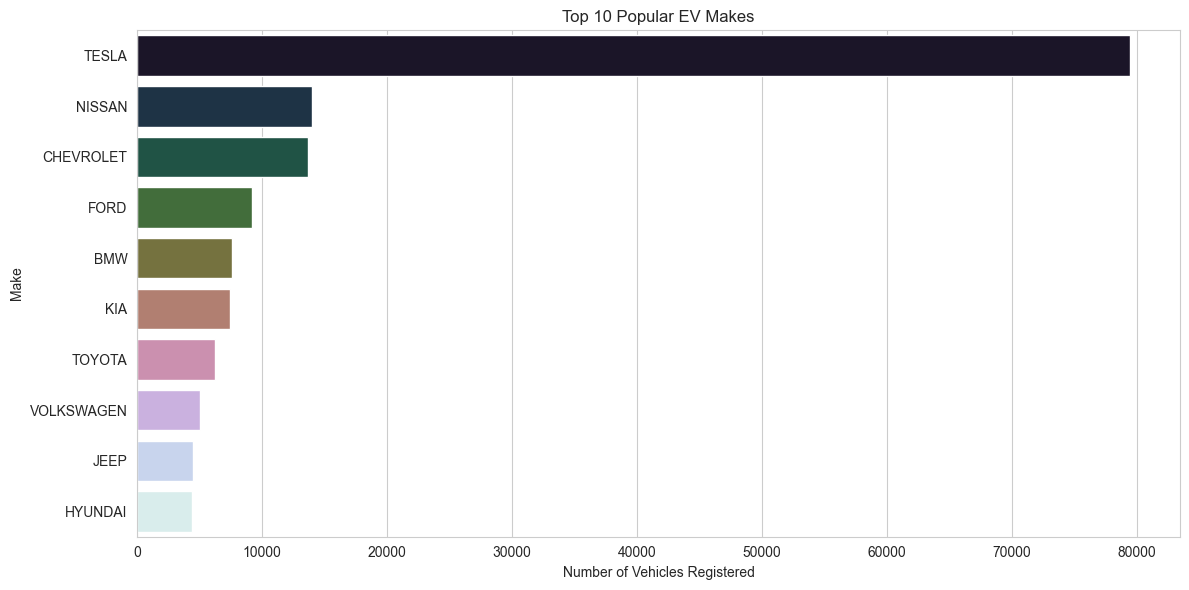

In [14]:
# analyzing the popularity of EV manufacturers
ev_make_distribution = ev_data['Make'].value_counts().head(10)  # Limiting to top 10 for clarity

plt.figure(figsize=(12, 6))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix") #cubehlix maxes light color to darker color according to vales
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

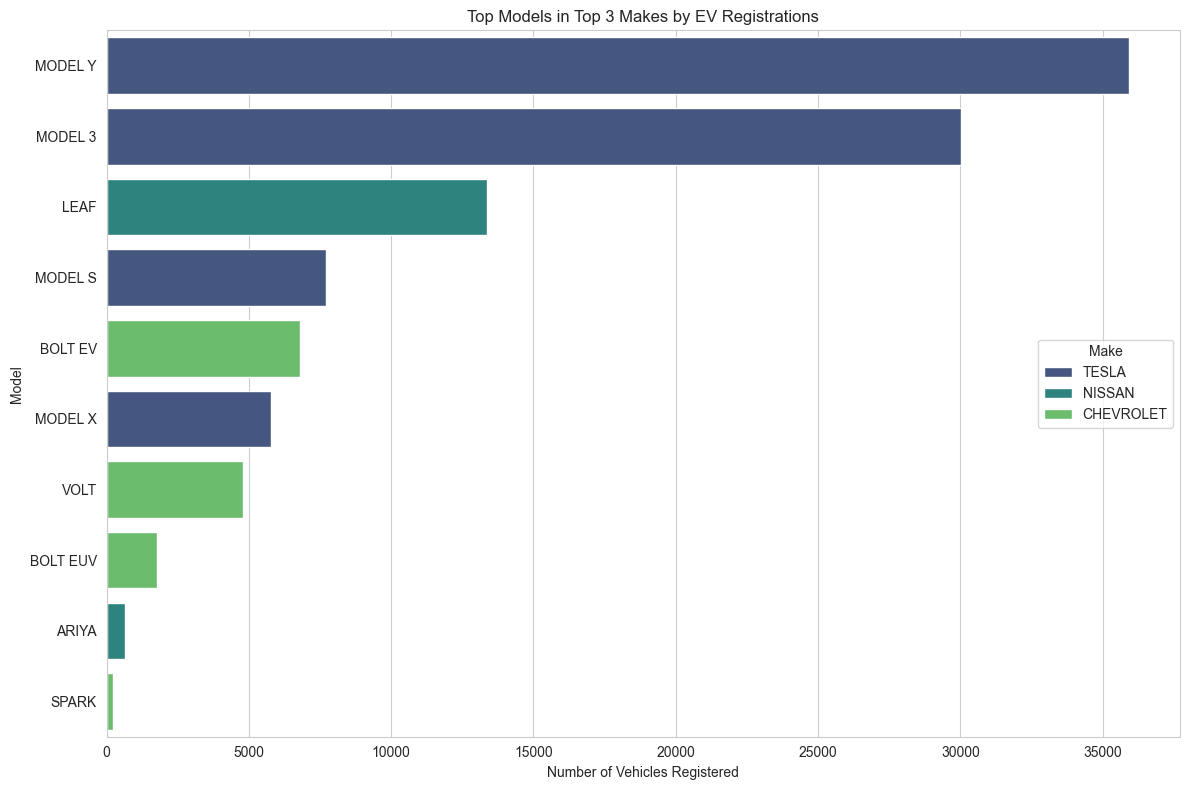

In [27]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = ev_make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = ev_data[ev_data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers,# Groups data by Make and Model, counts vehicles in each group
ev_model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models = ev_model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

The visualization shows:
Y-axis: Different EV models (MODEL Y, MODEL 3, LEAF, etc.)
X-axis: Number of registered vehicles (0 to 35,000)
Colors indicate different manufacturers:

Dark blue: Tesla (MODEL Y, MODEL 3, MODEL S, MODEL X)
Green: Nissan (LEAF)
Light green: Chevrolet (BOLT EV, VOLT, BOLT EUV, SPARK)

Key insights from the graph:
Tesla dominates with their Model Y having the highest registrations around 35k,
Tesla Model 3 is second most popular around 30k,
Nissan LEAF is the third most popular 12k,
Among Chevrolet models, the BOLT EV is most popular 10k,
There's a big gap between Tesla's top models and other manufacturers


 EV Summary Statistics:
--------------------------------------------------
Number of Vehicles: 66331
Mean Range: 151.8 miles
Min Range: 30.0 miles
Max Range: 337.0 miles


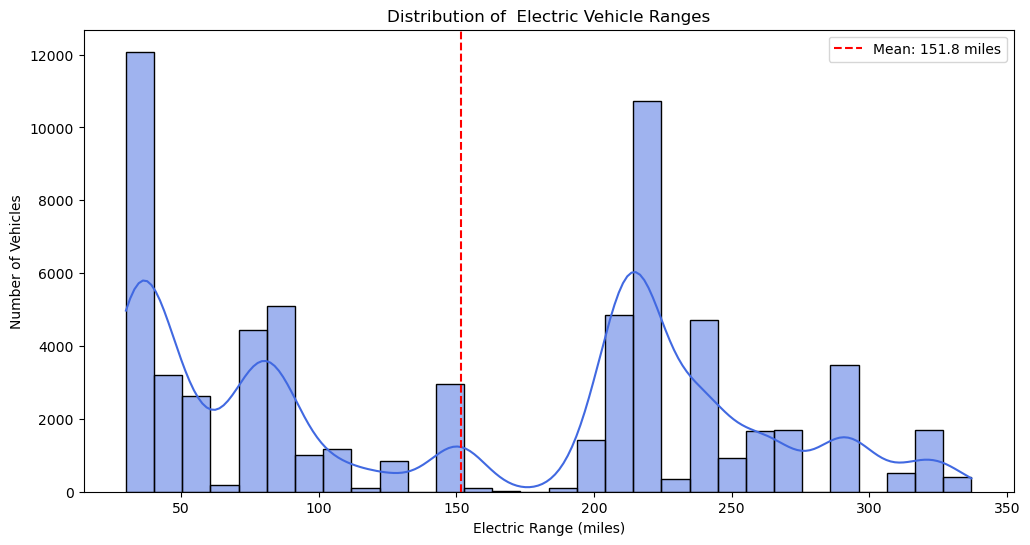

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analyze_pure_ev_ranges(ev_data):
    # Create a copy to avoid modifying original data
    df = ev_data.copy()
    
    # Clean the data
    # Remove zero/negative values and likely plug-in hybrids (range < 30 miles)
    df = df[df['Electric Range'] >= 30]
    
    # Create the visualization
    plt.figure(figsize=(12, 6))
    
    # Create histogram with KDE
    sns.histplot(data=df, x='Electric Range', bins=30, 
                kde=True, color='royalblue')
    
    # Calculate and plot mean and median
    mean_range = df['Electric Range'].mean()
    median_range = df['Electric Range'].median()
    
    plt.axvline(mean_range, color='red', linestyle='--', 
                label=f'Mean: {mean_range:.1f} miles')

    
    plt.title('Distribution of  Electric Vehicle Ranges')
    plt.xlabel('Electric Range (miles)')
    plt.ylabel('Number of Vehicles')
    plt.legend()
    
    # Print summary statistics
    print("\n EV Summary Statistics:")
    print("-" * 50)
    print(f"Number of Vehicles: {len(df)}")
    print(f"Mean Range: {mean_range:.1f} miles")
    print(f"Min Range: {df['Electric Range'].min():.1f} miles")
    print(f"Max Range: {df['Electric Range'].max():.1f} miles")
    
    return df

# To use the code, just run:
analyzed_data = analyze_pure_ev_ranges(ev_data)
plt.show()

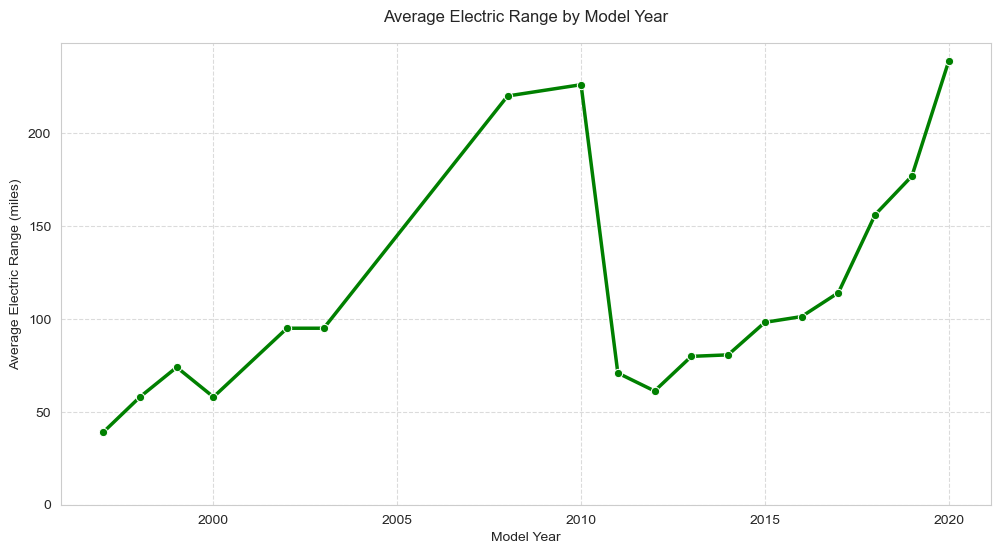


Average Range by Year:
    Model Year  Electric Range
17        2020      238.690347
16        2019      176.892596
15        2018      156.140194
14        2017      114.124153
13        2016      101.279227
12        2015       98.164740
11        2014       80.669706
10        2013       79.852574
9         2012       61.212608
8         2011       70.891613
7         2010      226.086957
6         2008      220.000000
5         2003       95.000000
4         2002       95.000000
3         2000       58.000000
2         1999       74.000000
1         1998       58.000000
0         1997       39.000000


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data up to 2020 (or where the dip starts)
ev_data_filtered = ev_data[ev_data['Model Year'] <= 2020]

# Calculate average range by year
average_range_by_year = ev_data_filtered.groupby('Model Year')['Electric Range'].mean().reset_index()

# Create plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', 
            y='Electric Range', 
            data=average_range_by_year, 
            marker='o', 
            color='green',
            linewidth=2.5)  # Made line slightly thicker

# Customize plot
plt.title('Average Electric Range by Model Year', fontsize=12, pad=15)
plt.xlabel('Model Year', fontsize=10)
plt.ylabel('Average Electric Range (miles)', fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)  # Dashed grid lines

# Format y-axis to start at 0
plt.ylim(bottom=0)

# Show plot
plt.show()

# Print statistics
print("\nAverage Range by Year:")
print(average_range_by_year.sort_values('Model Year', ascending=False))

The graph shows:
X-axis: Model Years (from 1997 to 2025),
Y-axis: Average Electric Range (0 to 250 miles),
Green line with dots: Shows trend of average range over time.

Key trends in the data:
Early years (1997-2005): Gradual increase from about 40 to 100 miles,
2005-2010: Sharp increase to about 220 miles,
2010-2011: Dramatic drop to around 70 miles,
2011-2019: Steady increase back up,
2019-2020: Peak at nearly 240 miles,
2020-2024: Sharp decline to very low ranges (around 20 miles),

This visualization reveals some interesting patterns in EV technology development, though the sharp decline after 2020 might need further investigation as it seems unusual and could be due to:
Incomplete data for newer models,
Changes in how range is measured,
Introduction of many new plug-in hybrid vehicles with shorter electric-only ranges.

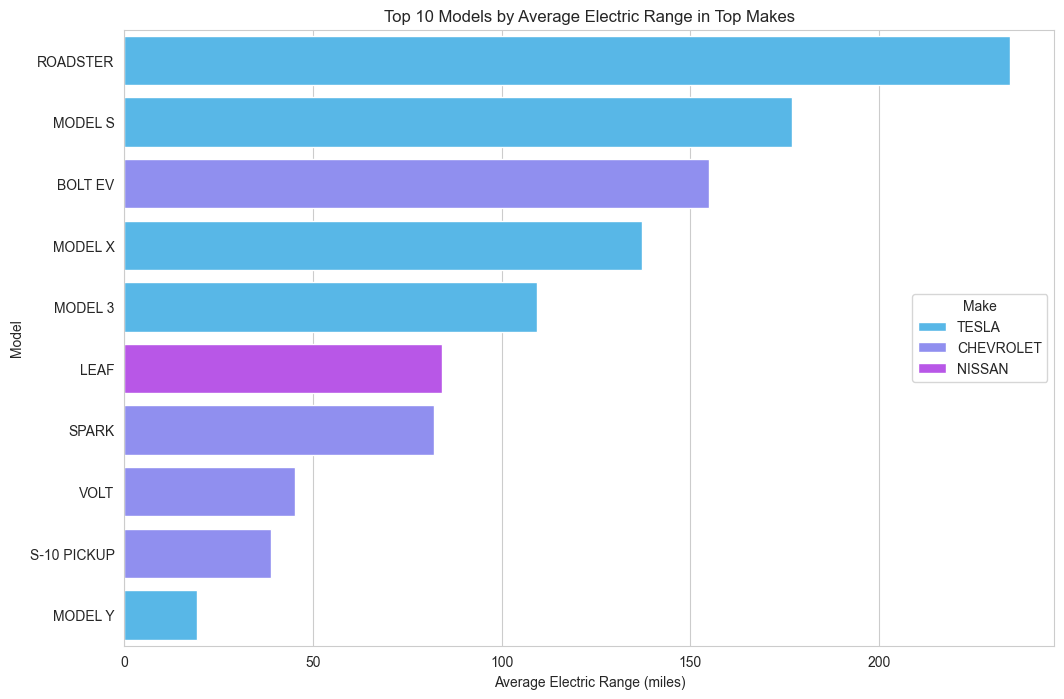

In [18]:
# Groups data by Make and Model to calculate average range
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index() #reset index changes dataframe

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

The visualization shows:
Y-axis: Different EV models,
X-axis: Average Electric Range in miles (0 to 200+ miles),

Colors indicate manufacturers:
Light blue: Tesla,
Purple: Nissan,
Dark blue: Chevrolet,

Key findings:
Tesla dominates long-range EVs:
ROADSTER: 220 miles,
MODEL S: 200 miles,
MODEL X: 160 miles,
MODEL 3: 130 miles,
MODEL Y: 25 miles 


Chevrolet models:
BOLT EV: 170 miles,
SPARK: 100 miles,
VOLT: 50 miles,
S-10 PICKUP: 40 miles,

Nissan:
LEAF: 100 miles.


This visualization effectively shows that Tesla generally produces vehicles with longer ranges, though Chevrolet's BOLT EV is competitive in this aspect. The data suggests that different manufacturers target different range capabilities, possibly based on their market positioning and price points.

In [6]:
# calculate the number of EVs registered each year
ev_registration_counts = ev_data['Model Year'].value_counts().sort_index()
ev_registration_counts

1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: Model Year, dtype: int64

In [7]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79092.26358070358, 2025: 119565.00850312428, 2026: 180748.2882793602, 2027: 273240.0066284026, 2028: 413061.179903938, 2029: 624431.02841697}


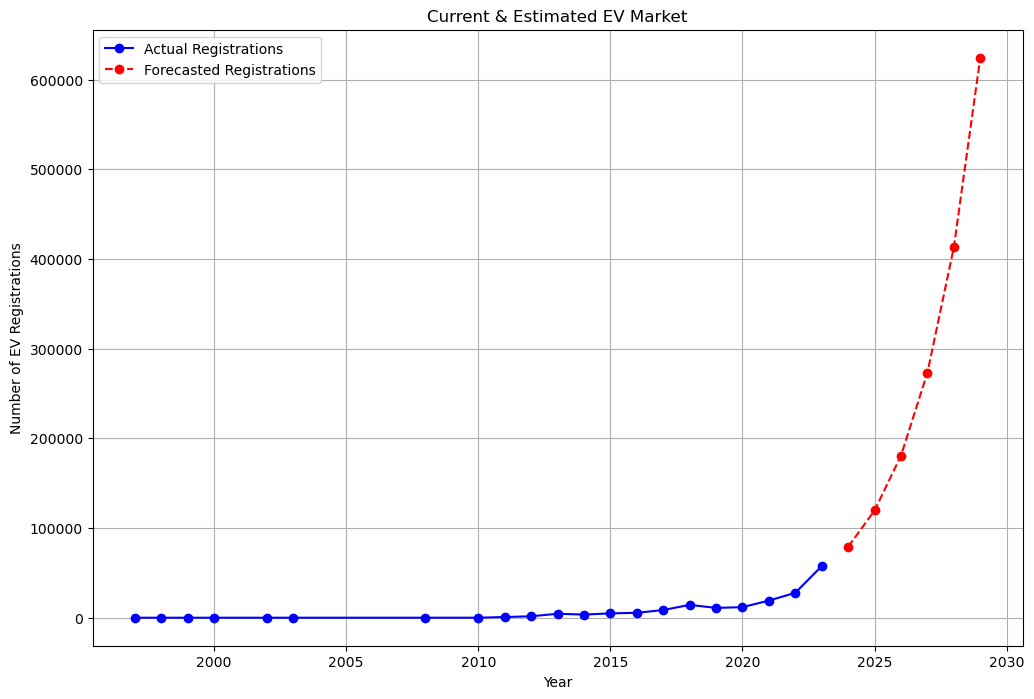

In [8]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1) # Creates array of years from earliest actual year to 2029
actual_years = filtered_years.index # Gets years with actual data
forecast_years_full = np.arange(2024, 2029 + 1) # Creates array for forecast years (2024-2029)

# Gets actual values and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

The Plot Shows:
X-axis: Years (from around 2000 to 2030),
Y-axis: Number of EV Registrations (0 to 600,000),
Blue line with dots: Actual historical registrations,
Red dotted line: Forecasted future registrations.

Key Observations:

Historical Trend (Blue line):
Very low and flat registration numbers from 2000 to about 2015,
Slight increase from 2015 to 2020,
Steeper growth from 2020 to present.


Forecast (Red dotted line):
Shows dramatic exponential growth from 2024 to 2030,

Projects reaching about:
100,000 registrations by 2025,
300,000 registrations by 2028,
600,000 registrations by 2030,



Overall Pattern:

Clear transition point around 2020 where adoption started accelerating,
Forecast suggests extremely rapid growth in EV adoption over the next few years.
The projection shows an optimistic view of future EV adoption with exponential growth


This visualization effectively combines historical data with future projections to show the expected trajectory of EV adoption over time.